In [161]:
#magic example database
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install scikit-learn

%pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
cols=['fLength','fWidth', 'fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [163]:
df["class"]=(df["class"]=="g").astype(int)

<h1>CLASSIFICATION</h1>

<h2>Types</h2>
qualitative -one hot encoding (1)
quantitative - numerical valued data (continuous and discrete)
feature -feature vector
label - target variable


<h2> supervised learning tasks</h2>

datasets
training set - used to train the model
validation set - used to tune the hyperparameters
test set - used to evaluate the model

<h2>loss functions</h2>
loss=sum(|yreal - y predicted)
accuracy = 3/4 or 75% 



classification - discrete valued output hotdog/not hotdog binary/multi class
regression - predict continuous values

unsupervised learning tasks
clustering - grouping similar data points together
dimensionality reduction - reducing the number of features in a dataset
to make it easier for machine learning algorithms to work with them.




fLength


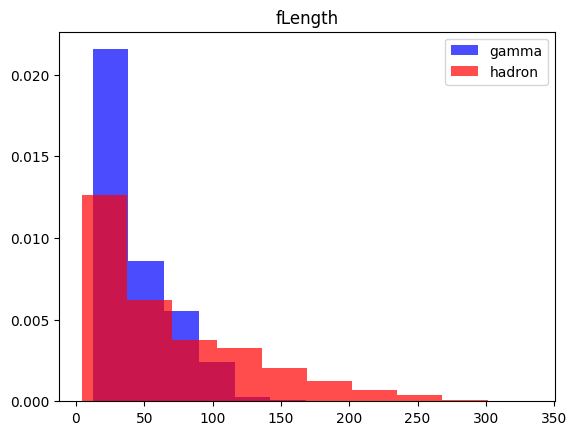

fWidth


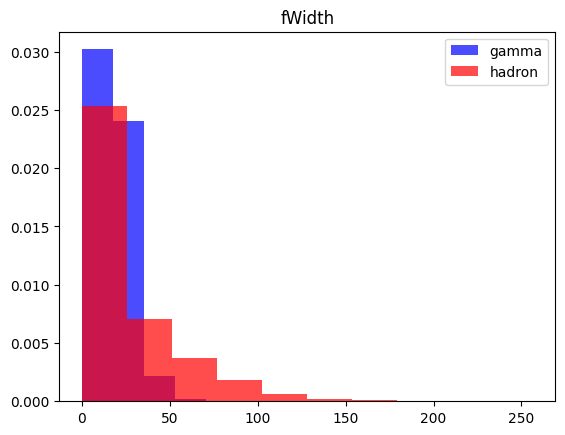

fSize


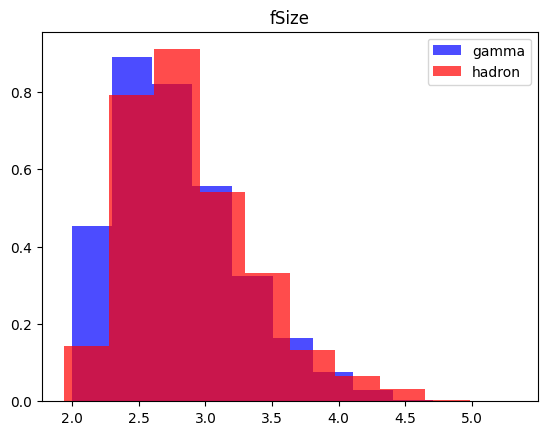

fConc


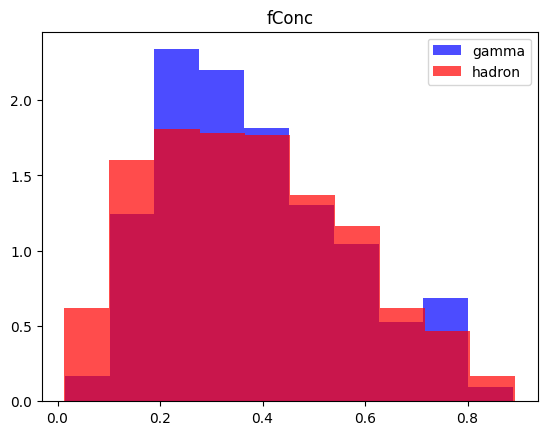

fConc1


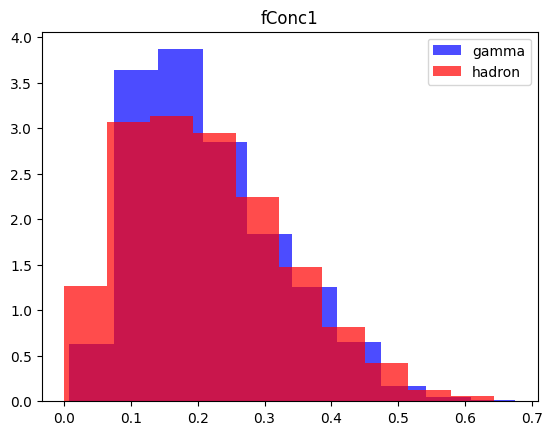

fAsym


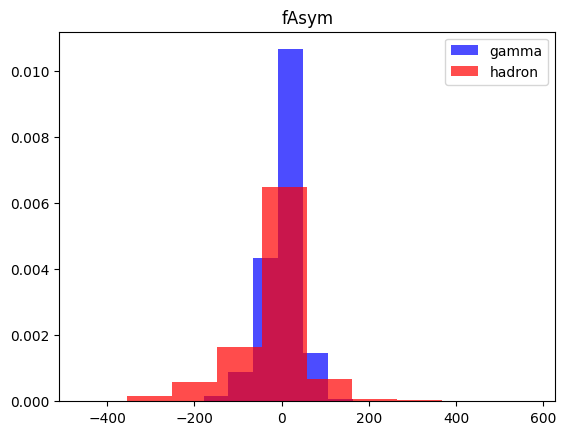

fM3Long


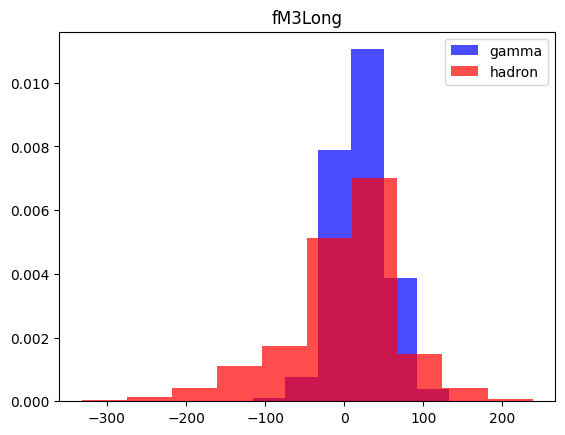

fM3Trans


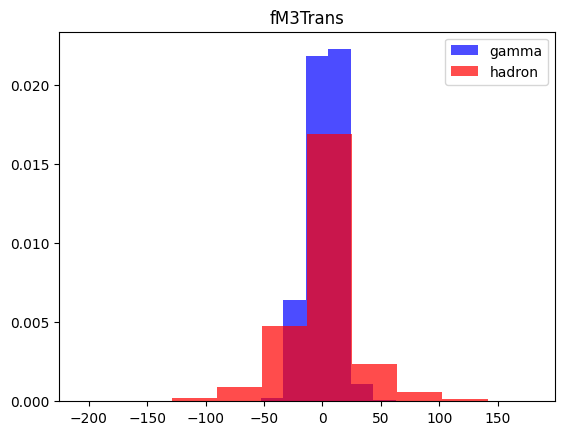

fAlpha


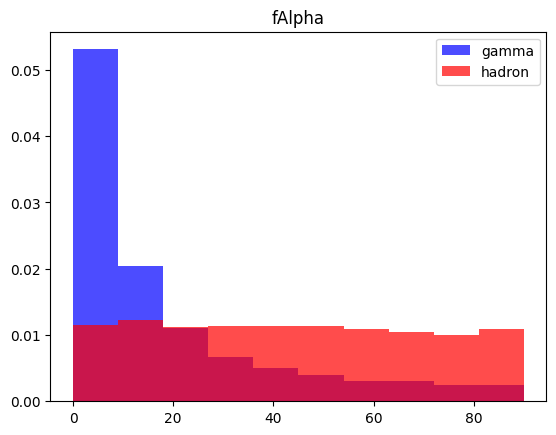

fDist


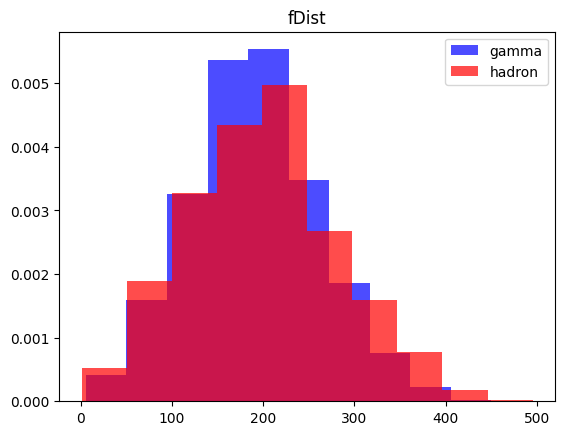

In [164]:
for label in cols[:-1]:
    print(label)
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.legend()#indexes
    plt.show()

#Train,validation,test datasets

In [165]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df),),int(0.8*len(df))])

print(len(train[train['class']==1]))
print(len(train[train['class']==0]))


7430
3982


In [166]:


def scale_dataset(dataframe, oversample=False):
    X = dataframe.iloc[:, :-1]  # Extract features (all columns except the last)
    y = dataframe.iloc[:, -1]    # Extract target (last column)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X_scaled, y)
        return X_resampled, y_resampled
    
    return X_scaled, y

# Usage example
X_train, y_train = scale_dataset(train, oversample=True)
X_valid, y_valid = scale_dataset(valid, oversample=False)
X_test, y_test = scale_dataset(test, oversample=False)


In [167]:
sum(y_train==1) - sum(y_train==0)

# uniform

0

<h2>KNN- k nearest neighbours</h2>

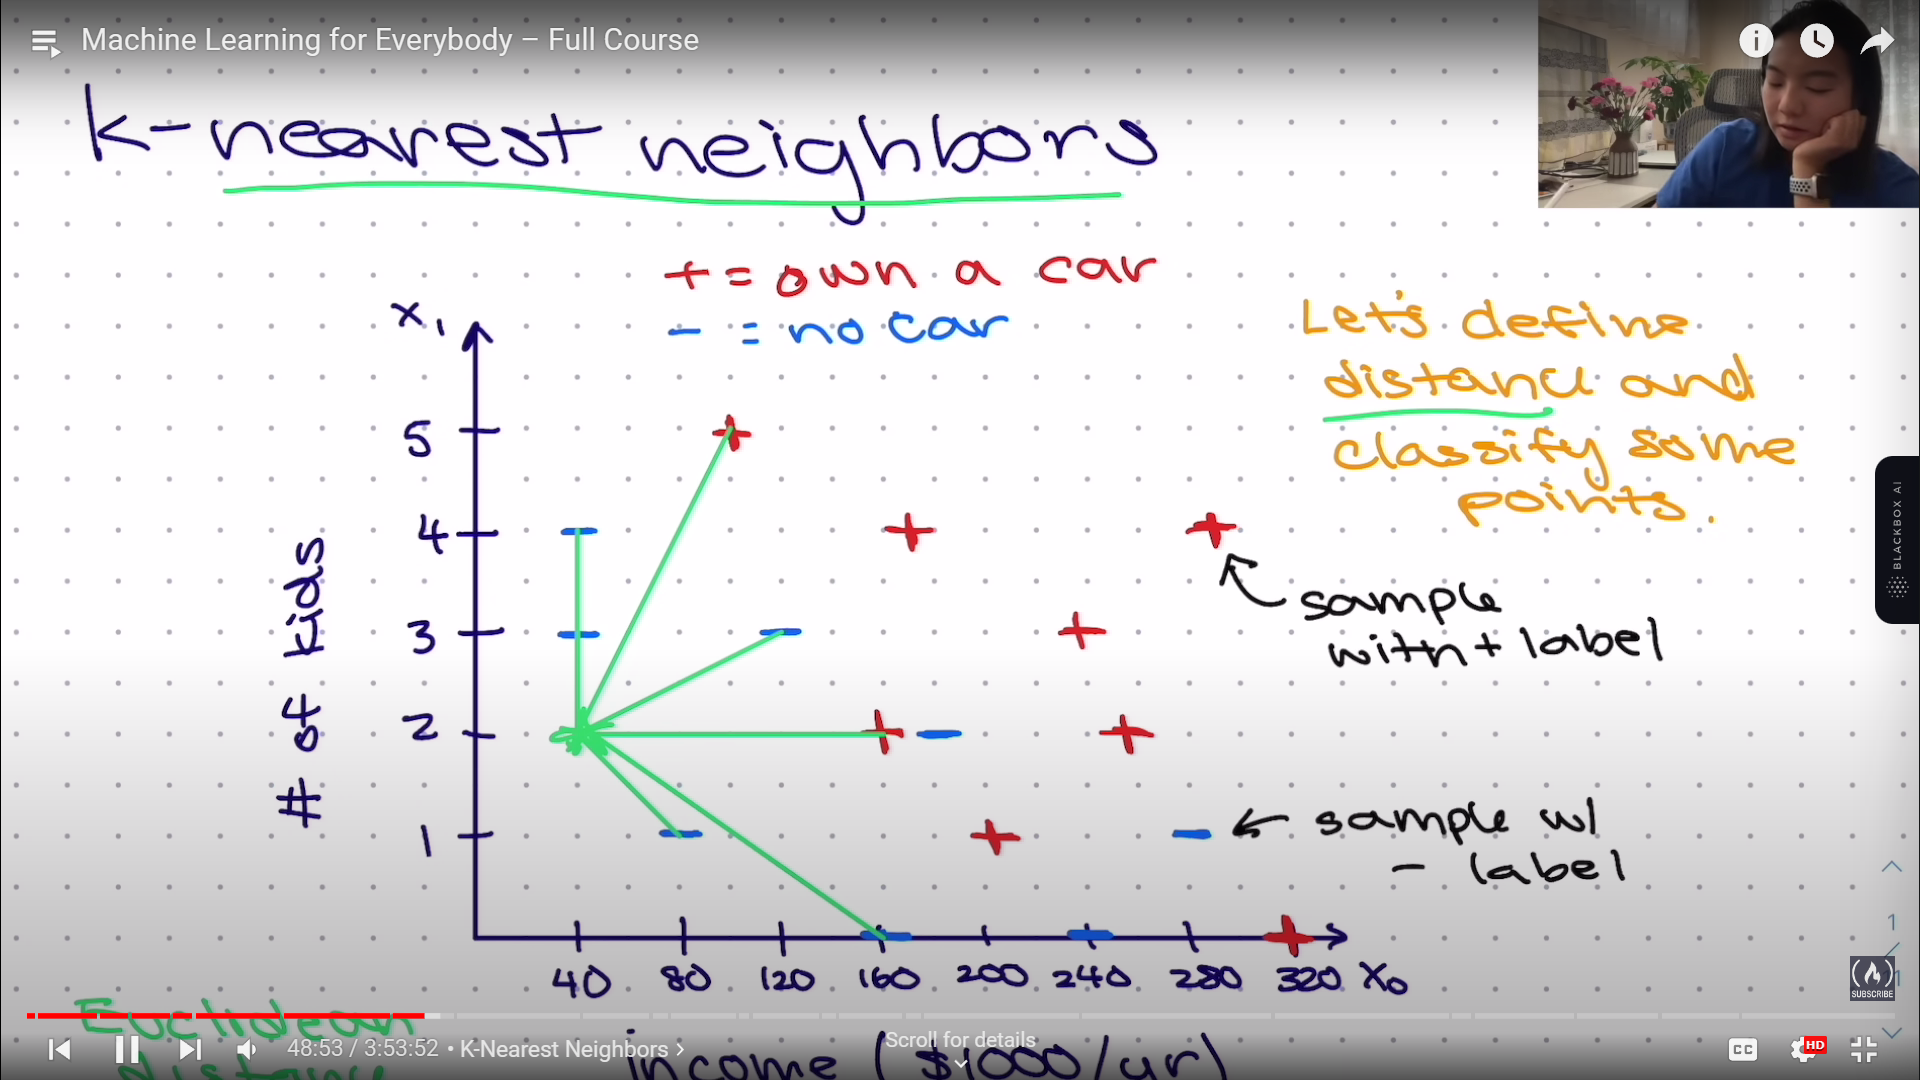

In [168]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report




In [169]:
knn_model=KNeighborsClassifier(n_neighbors=10)  
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [170]:
y_pred=knn_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

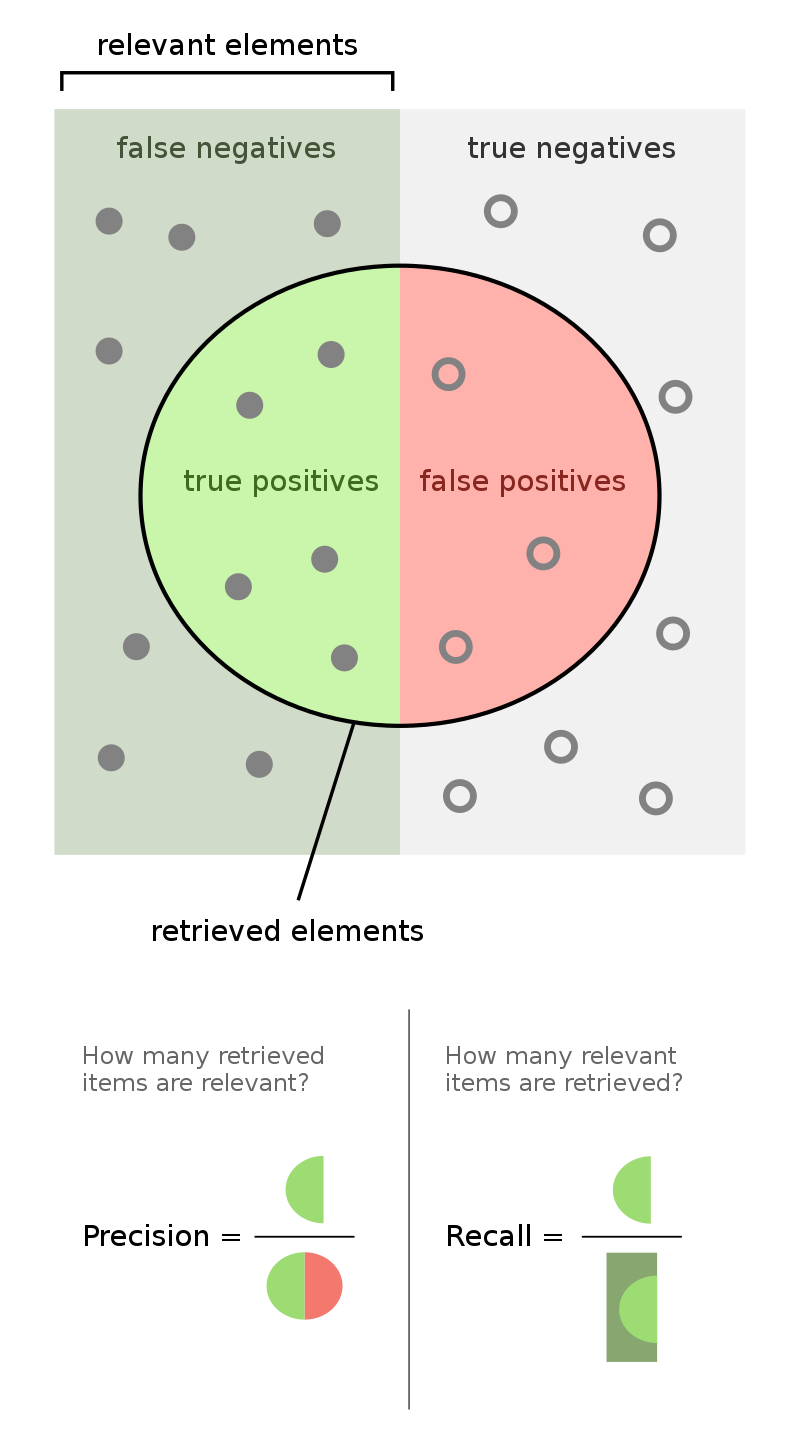

In [171]:
print(classification_report(y_test,y_pred))
#precision and recall

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1356
           1       0.88      0.87      0.87      2448

    accuracy                           0.84      3804
   macro avg       0.82      0.82      0.82      3804
weighted avg       0.84      0.84      0.84      3804



Precision: The precision values for class 0 and class 1 are 0.77 and 0.84, respectively. This indicates that when the model predicts class 0, it is correct around 77% of the time, and when it predicts class 1, it is correct around 84% of the time.

Recall: The recall values for class 0 and class 1 are 0.69 and 0.89, respectively. This means that the model correctly identifies approximately 69% of the actual class 0 instances and around 89% of the actual class 1 instances.

<h2>Naive Bayes </h2>

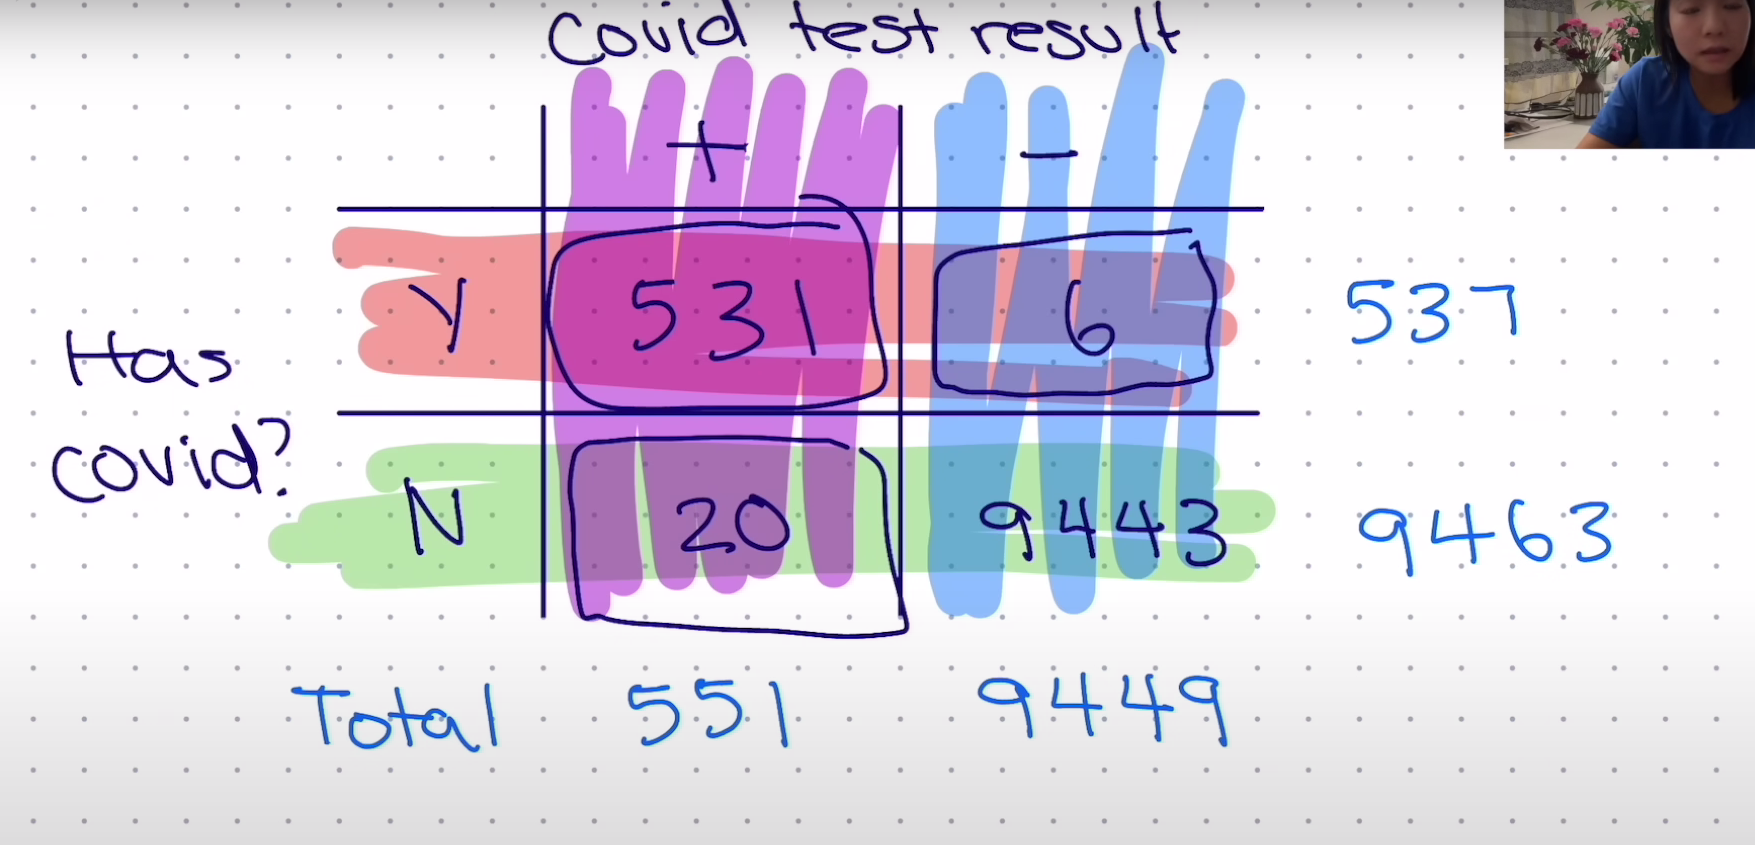

<h2>Bayes Rule</h2>
- P(A|B)=P(B|A)*P(A)/P(B)

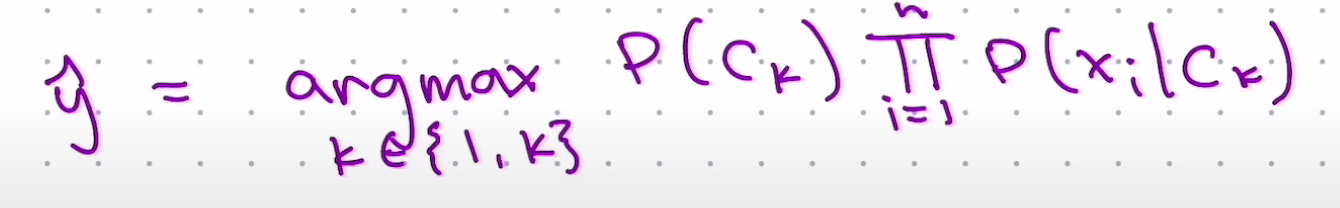


In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [174]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1356
           1       0.73      0.90      0.80      2448

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



<h2>Logistic Regression</h2>

How can we model probability?


<h2>Sigmoid function</h2>
- fitting our dataset to model
S=1/1+e^-y

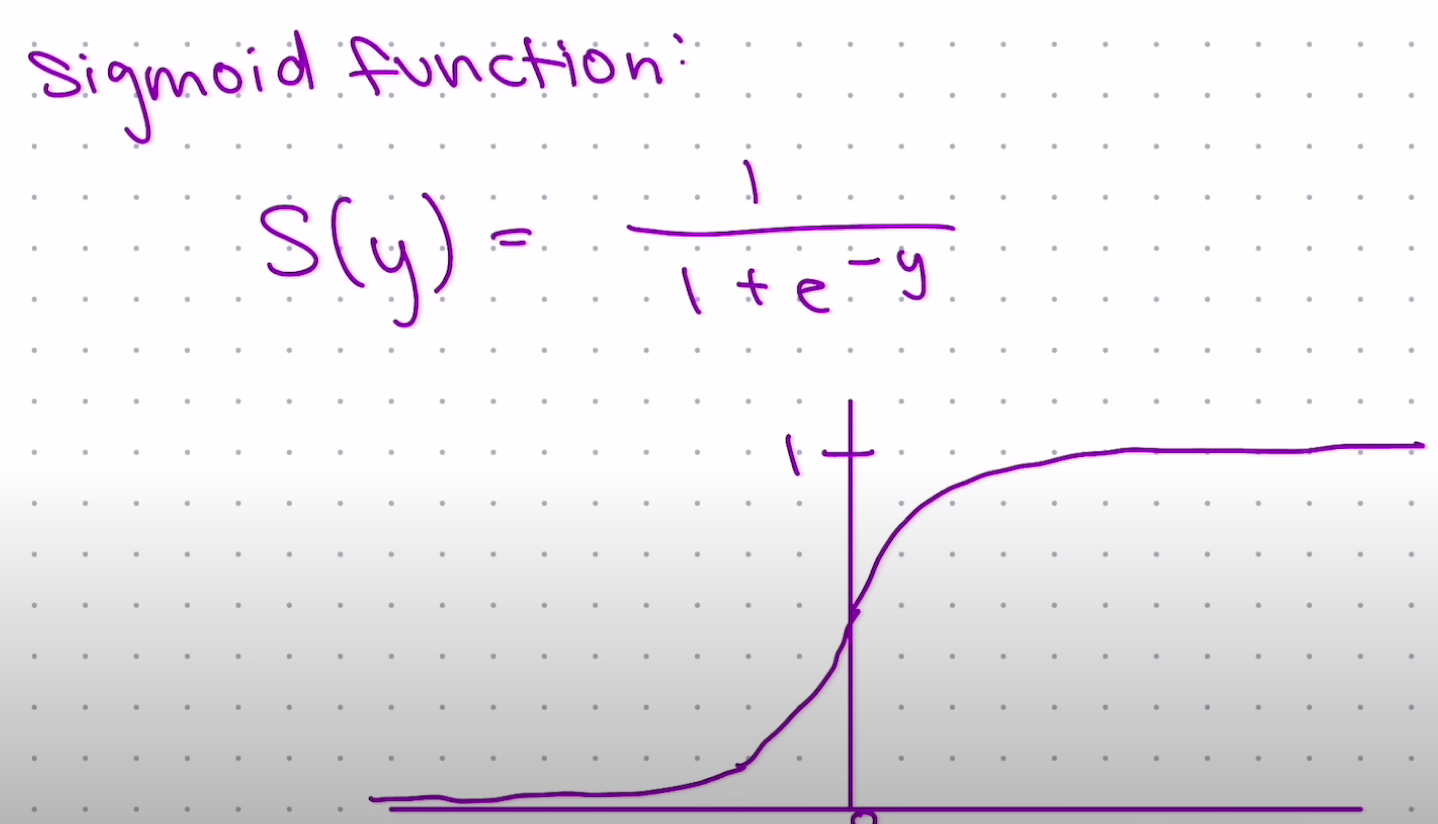



In [175]:
#log regression

from sklearn.linear_model import LogisticRegression

In [176]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [177]:
y_pred=lg_model.predict(X_test)#predicting using testing data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1356
           1       0.84      0.83      0.84      2448

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



<h2>Support Vector Machines</h2>

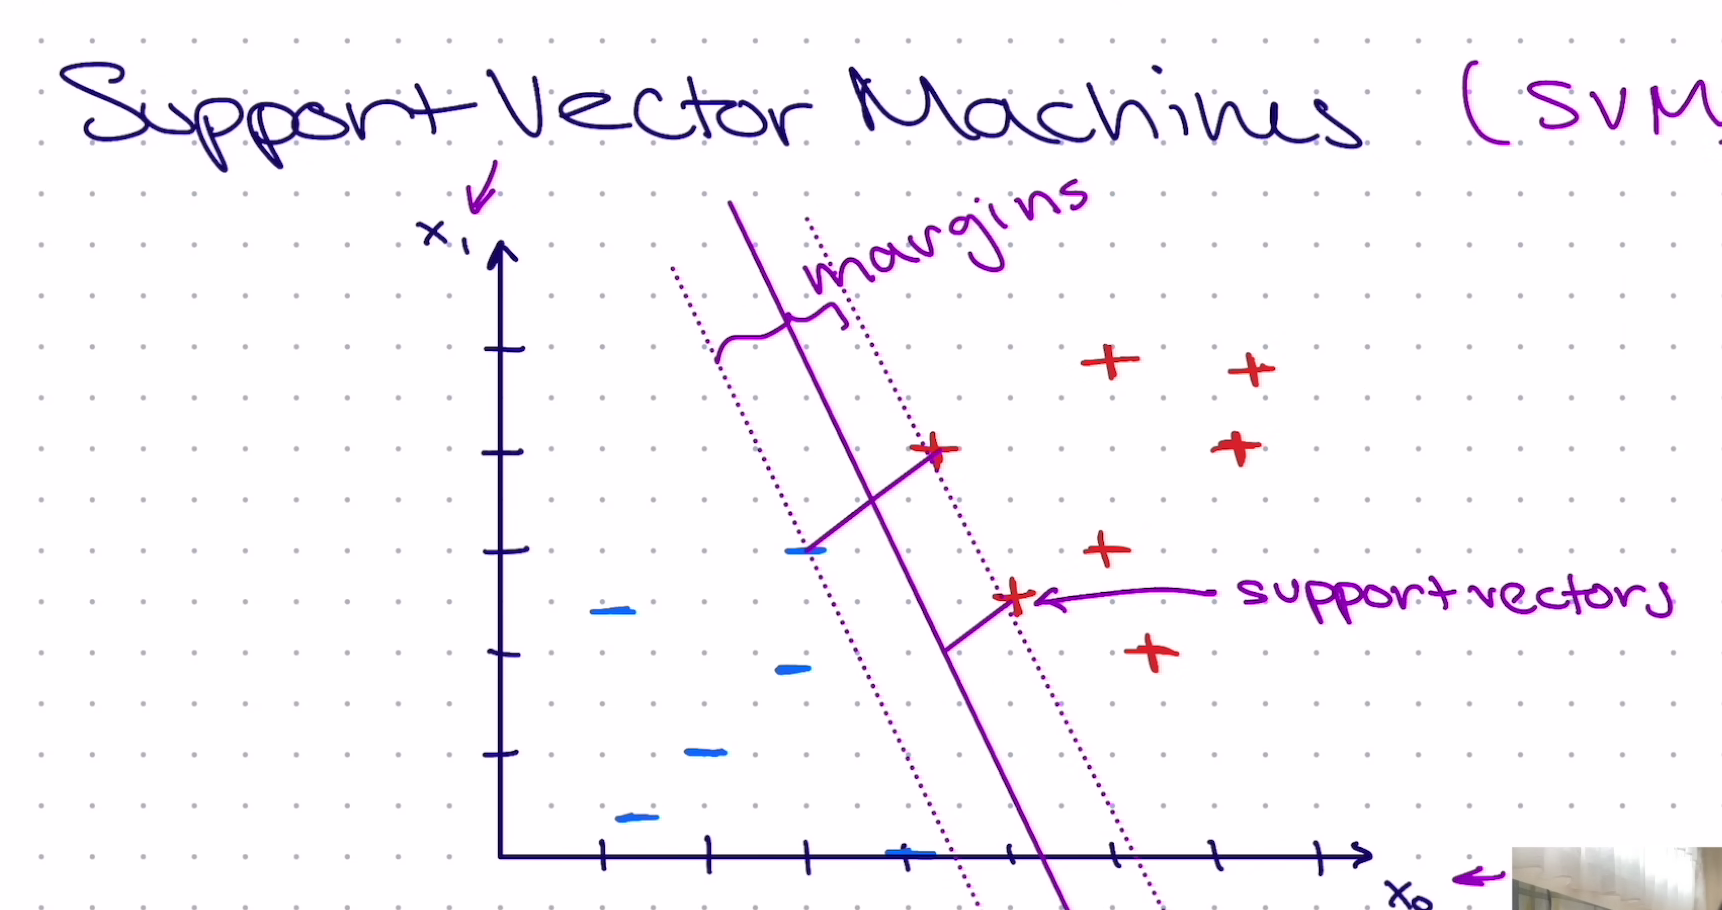

In [178]:
from sklearn.svm import SVC

In [179]:
#model
svc_model=SVC()
svc_model=svc_model.fit(X_train,y_train)

In [180]:
y_pred=svc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1356
           1       0.89      0.91      0.90      2448

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



<h2>Neural Networks</h2>

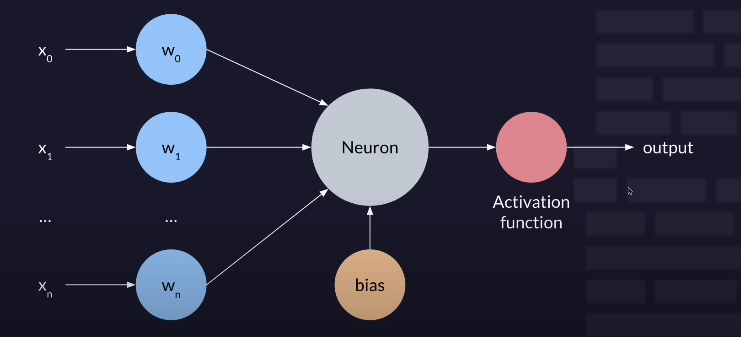
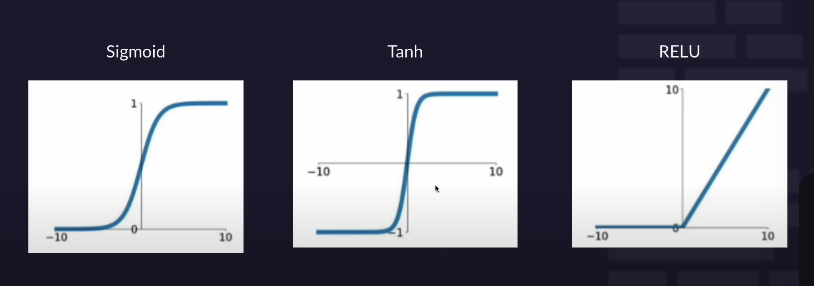

In [181]:
#without activation function it becomes linear

